In [1]:
import numpy as np
from random import randint, choice




class Matrix:
    def __init__(self, dim = 50, p_one = 0.35, p_two = 0.35, threshold = 0.6):

        self.dim = dim
        self.entries = dim * dim
        self.n_one = int(self.entries * p_one)
        self.n_two = int(self.entries * p_two)
        self.n_empy = self.entries - (self.n_one + self.n_two)
        self.threshold = threshold
        self.matrix = np.zeros(shape=(dim, dim))

        self.populate()

    def populate(self):
        i = 0

        while i < self.n_one:
            x = randint(0, self.dim - 1)
            y = randint(0, self.dim - 1)
            if self.matrix[x][y] == 0:
                self.matrix[x][y] = 1
                i += 1

        i = 0
        count_two = 0
        while i < self.n_two:
            x = randint(0, self.dim - 1)
            y = randint(0, self.dim - 1)
            if self.matrix[x][y] == 0:
                self.matrix[x][y] = 2
                i += 1

    def assert_unsatisfied(self):
        unsatisfied = []
        for x in range(self.dim):
            for y in range(self.dim):
                if self.matrix[x][y] != 0:
                    if self.check_position(x, y):
                        unsatisfied.append((x, y))
        #print("Unsastisfied: ", unsatisfied)
        return unsatisfied

    def check_position(self, x, y):
        neighborhood = self.get_neighborhood(x,y)
        position = (x, y)
        return self.check_neighborhood(neighborhood, position)

    def get_neighborhood(self, x, y):
        neighbors = list()
        to_remove = list()
        neighbors.append((x, y - 1))
        neighbors.append((x, y + 1))
        neighbors.append((x - 1, y))
        neighbors.append((x + 1, y))
        neighbors.append((x - 1, y - 1))
        neighbors.append((x - 1, y + 1))
        neighbors.append((x + 1, y - 1))
        neighbors.append((x + 1, y + 1))
        for t in neighbors:
            if t[0] < 0 or t[0] > self.dim-1:
                to_remove.append(t)
            elif t[1] < 0 or t[1] > self.dim-1:
                to_remove.append(t)

        for r in to_remove:
            neighbors.remove(r)

        #return self.check_neighborhood(neighbors, position)
        return neighbors

    # number of different races not being used
    def check_neighborhood(self, neighborhood, pos) -> bool:
        ratio = self.get_position_ratio(neighborhood, pos)
        return ratio < self.threshold

    def get_position_ratio(self, neighborhood, pos):
        my_race = self.matrix[pos[0]][pos[1]]
        # print("NEIGHBORHOOD: ", neighborhood)
        same_race = 0
        num_neighbors = 0

        for neighbor in neighborhood:
            if self.matrix[neighbor[0]][neighbor[1]] == 0:
                continue
            elif self.matrix[neighbor[0]][neighbor[1]] == my_race:
                same_race += 1
            num_neighbors += 1

        try:
            ratio = same_race / num_neighbors
        except ZeroDivisionError:
            ratio = 1
        return ratio

    def move_unsatisfied(self, unsat):

        empty_positions = self.empty_positions()

        for u in unsat:
            random_empty = choice(empty_positions)
            self.matrix[random_empty[0]][random_empty[1]] = self.matrix[u[0]][u[1]]
            self.matrix[u[0]][u[1]] = 0
            empty_positions.remove(random_empty)
            empty_positions.append((u[0], u[1]))

    def empty_positions(self) -> list:
        empty = list()
        for i in range(self.dim):
            for j in range(self.dim):
                if self.matrix[i][j] == 0:
                    empty.append((i, j))
        return empty

    def calculate_segregation(self):
        similarity = []
        for x in range(self.dim):
            for y in range(self.dim):
                if self.matrix[x][y] != 0:
                    neighborhood = self.get_neighborhood(x ,y)
                    position = (x, y)
                    similarity.append(self.get_position_ratio(neighborhood, position))
        return sum(similarity)/len(similarity) if len(similarity) != 0 else 0


    
print('fet def')

fet def


In [13]:
import networkx as nx
from random import choice

class Scale_Free:

    def __init__(self, size = 2500, p_one = 0.35, p_two = 0.35, threshold = 0.6):
        self.size = size
        self.n_one = int(self.size * p_one)
        self.n_two = int(self.size * p_two)
        print("ONE ", self.n_one)
        print("TWO ", self.n_two)
        self.n_empty = self.size - (self.n_one + self.n_two)
        print("EMPTY: ", self.n_empty)
        self.threshold = threshold

        self.graph = nx.barabasi_albert_graph(size, 3)
        #self.graph = nx.scale_free_graph(size)
        #self.graph = self.graph.to_undirected()
        self.races = {node: 0 for node in self.graph.nodes()}
        self.populate()

    def populate(self):
        empty_positions = self.empty_nodes()

        for i in range(self.n_one):
            node = choice(empty_positions)
            self.races[node] = 1
            empty_positions.remove(node)

        for j in range(self.n_two):
            node = choice(empty_positions)
            self.races[node] = 2
            empty_positions.remove(node)

    def empty_nodes(self) -> list :
        empty = [node for node in self.races.keys() if self.races[node] == 0]
        return empty

    def assert_unsatisfied(self):
        unsatisfied = []
        for node in self.graph.nodes():
            if self.races[node] == 0:
                continue
            elif self.check_neighborhood(node):
                unsatisfied.append(node)
        return unsatisfied

    def check_neighborhood(self, node):
        neighbors = self.graph.neighbors(node)
        my_race = self.races[node]
        same_race = 0
        num_neighbors = 0
        for n in neighbors:
            if self.races[n] == 0:
                continue
            elif self.races[n] == my_race:
                same_race += 1
            num_neighbors += 1

        try:
            ratio = same_race / num_neighbors
        except ZeroDivisionError:
            return False
        return ratio < self.threshold

    def move_unsatisfied(self, unsat):
        empty_positions = self.empty_nodes()

        for u in unsat:
            random_empty = choice(empty_positions)
            self.races[random_empty] = self.races[u]
            self.races[u] = 0
            empty_positions = self.empty_nodes()

    def get_race_list(self, race):
        res = [node for node in self.races if self.races[node] == race]
        return res

    def get_node_ratio(self, node):
        neighborhood = self.graph.neighbors(node)
        same_race = 0
        num_neighbors = 0
        for n in neighborhood:
            if self.races[n] == 0:
                continue
            if self.races[n] == self.races[node]:
                same_race += 1
            num_neighbors += 1
        return same_race / num_neighbors if num_neighbors != 0 else 1

    def calculate_segregation(self):
        similarity = []
        for n in self.graph.nodes():
            if self.races[n] != 0:
                similarity.append(self.get_node_ratio(n))
        return sum(similarity)/len(similarity) if len(similarity)!= 0 else 0
    
    
print('fet def2')

fet def2


In [16]:
import matplotlib.pyplot as plt
import networkx as nx
import argparse

print('comencem bé')

def run_matrix(threshold, ones, twos, dimension):
    m = Matrix(dimension, ones, twos, threshold)
    segregation = list()
    print(m.matrix)
    unsatisfied = m.assert_unsatisfied()
    unsat_evolution = []
    print("Unsatisfied percentage = ", (len(unsatisfied) / m.entries) * 100)
    segregation.append((m.calculate_segregation() - 0.5)*2)
    steps = 0
    while len(unsatisfied) > 0:
        m.move_unsatisfied(unsatisfied)
        #print(m.matrix)
        unsatisfied = m.assert_unsatisfied()
        print("Unsatisfied percentage = ", (len(unsatisfied) / m.entries) * 100)
        segregation.append((m.calculate_segregation() - 0.5)*2)
        unsat_evolution.append(len(unsatisfied) / m.entries * 100)
        steps += 1


    print("all satisfied.\n steps: ", steps)
    #plt.imshow(m.matrix, interpolation='nearest')
    #plt.show()
    #steps = list(range(len(segregation)))

    plt.imshow(m.matrix, interpolation='nearest')
    plt.show()

    plt.plot(unsat_evolution)
    plt.xlabel('number of steps')
    plt.ylabel('unsatisfaction percentage')
    plt.show()

    plt.plot(segregation)
    plt.xlabel('number of steps')
    plt.ylabel('Segregation')
    plt.show()

def run_graph(threshold, ones, twos, dimension):
    g = (dimension*dimension, ones, twos, threshold)
    unsatisfied = g.assert_unsatisfied()
    #print("unsatisfied:", unsatisfied)
    steps = 0
    unsat_evolution = list()
    segregation = list()
    segregation.append((g.calculate_segregation() - 0.5)*2)
    while len(unsatisfied) > 0:
        g.move_unsatisfied(unsatisfied)
        unsatisfied = g.assert_unsatisfied()
        print("Unsatisfied percentage = ", (len(unsatisfied) / g.size) * 100)
        steps += 1
        unsat_evolution.append((len(unsatisfied) / g.size) * 100)
        segregation.append((g.calculate_segregation() - 0.5) * 2)

    print("all satisfied.\n steps: ", steps)
    plot_graph(g)
    plt.plot(unsat_evolution)
    plt.show()

    plt.plot(segregation)
    plt.show()


def plot_graph(g):
    race_one = g.get_race_list(1)
    print(len(race_one))
    race_two = g.get_race_list(2)
    print(len(race_two))
    empty = g.empty_nodes()
    print(len(empty))
    pos = nx.spring_layout(g.graph)
    nx.draw_networkx_nodes(g.graph, pos, nodelist=race_one, node_color='b', node_size=100, alpha=0.8)
    nx.draw_networkx_nodes(g.graph, pos, nodelist=race_two, node_color='g', node_size=100, alpha=0.8)
    nx.draw_networkx_nodes(g.graph, pos, nodelist=empty, node_color='r', node_size=100, alpha=0.8)

    nx.draw_networkx_edges(g.graph, pos, width=1.0, alpha=0.5)
    plt.show()

def plot_steps_unsat(steps, unsat_evolution):
    step_list = [i for i in range(steps)]

    plt.scatter(step_list, unsat_evolution)
    plt.show()

def verify_arguments(threshold, ones, twos):
    value = True
    print(ones)
    if threshold < 0 or threshold > 1:
        print('ERROR: Threshold must be between 0 and 1')
        value = False

    if ones < 0 or ones > 1:
        print('ERROR: Race one must be between 0 and 1')
        value = False

    if twos < 0 or twos > 1:
        print('ERROR: Race two must be between 0 and 1')
        value = False

    if ones+twos >= 1:
        print('ERROR: Race one + two must be under 1')
        value = False

    return value

if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='Computer simulation of the Schelling model')
    parser.add_argument("-tp","--type", help='Type of the representation of the model (either matrix or scalefree)', default='matrix')
    parser.add_argument('-thold', '--threshold', type=float, help='Threshold desired', default=0.3)
    parser.add_argument('-o','--ones', type=float, help='Percentage of agents belonging to race one', default=0.4)
    parser.add_argument('-t','--twos', type=float, help='Percentage of agents belonging to race two', default=0.4)
    parser.add_argument('-d', '--dimension', type=int, help='Percentage of agents belonging to race two', default=50)
    args = parser.parse_args()
    if not verify_arguments(args.threshold, args.ones, args.twos):
        print('Arguments given are not approriate')
    elif args.type == 'matrix':
        run_matrix(args.threshold, args.ones, args.twos, args.dimension)
    elif args.type == 'scalefree':
        run_graph(args.threshold, args.ones, args.twos, args.dimension)
    else:
        print('ERROR: Type must be either matrix or scalefree')

        
        

comencem bé


usage: ipykernel_launcher.py [-h] [-tp TYPE] [-thold THRESHOLD] [-o ONES] [-t TWOS] [-d DIMENSION]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\musta\AppData\Roaming\jupyter\runtime\kernel-a08ca1d4-791a-483e-85a1-d838446e0bb9.json


SystemExit: 2

0.4
[[1. 1. 0. ... 2. 0. 2.]
 [0. 0. 2. ... 1. 2. 1.]
 [1. 1. 1. ... 1. 2. 0.]
 ...
 [1. 0. 1. ... 1. 2. 2.]
 [1. 2. 2. ... 1. 0. 1.]
 [1. 0. 2. ... 2. 0. 1.]]


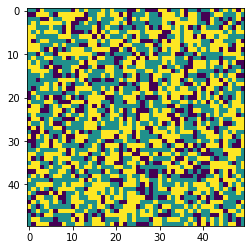

Unsatisfied percentage =  0.1428
Unsatisfied percentage =  0.08
Unsatisfied percentage =  0.0452
Unsatisfied percentage =  0.0304
Unsatisfied percentage =  0.0176
Unsatisfied percentage =  0.0124
Unsatisfied percentage =  0.0096
Unsatisfied percentage =  0.0044
Unsatisfied percentage =  0.0016
Unsatisfied percentage =  0.0012
Unsatisfied percentage =  0.0012
Unsatisfied percentage =  0.0008
Unsatisfied percentage =  0.0
all satisfied.
 steps:  12


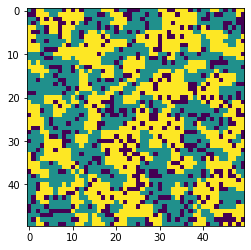

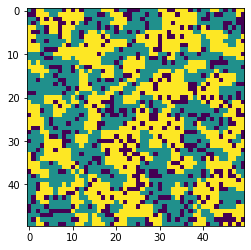

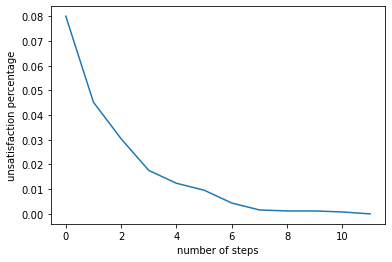

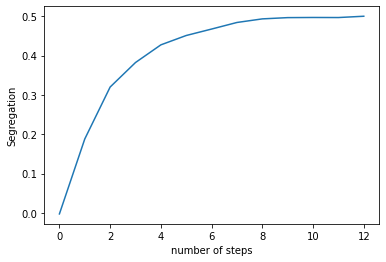

In [35]:
%run main.py


In [20]:
%run main.py -h 

usage: main.py [-h] [-tp TYPE] [-thold THRESHOLD] [-o ONES] [-t TWOS] [-d DIMENSION]

Computer simulation of the Schelling model

optional arguments:
  -h, --help            show this help message and exit
  -tp TYPE, --type TYPE
                        Type of the representation of the model (either matrix or scalefree)
  -thold THRESHOLD, --threshold THRESHOLD
                        Threshold desired
  -o ONES, --ones ONES  Percentage of agents belonging to race one
  -t TWOS, --twos TWOS  Percentage of agents belonging to race two
  -d DIMENSION, --dimension DIMENSION
                        Percentage of agents belonging to race two


In [30]:
%run main.py -h scalefree 0.4 0.4 0.6 70

usage: main.py [-h] [-tp TYPE] [-thold THRESHOLD] [-o ONES] [-t TWOS] [-d DIMENSION]

Computer simulation of the Schelling model

optional arguments:
  -h, --help            show this help message and exit
  -tp TYPE, --type TYPE
                        Type of the representation of the model (either matrix or scalefree)
  -thold THRESHOLD, --threshold THRESHOLD
                        Threshold desired
  -o ONES, --ones ONES  Percentage of agents belonging to race one
  -t TWOS, --twos TWOS  Percentage of agents belonging to race two
  -d DIMENSION, --dimension DIMENSION
                        Percentage of agents belonging to race two


0.4
[[0. 0. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 1. 0. 1. 1. 0. 1. 2. 0. 1. 2. 2. 2.
  2. 2. 2. 2. 2. 1.]
 [2. 2. 2. 2. 0. 1. 1. 2. 2. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1. 2. 2. 2.
  2. 1. 0. 0. 0. 1.]
 [2. 1. 0. 2. 1. 2. 2. 2. 2. 0. 2. 2. 1. 2. 1. 2. 2. 1. 0. 1. 2. 1. 2. 1.
  1. 1. 2. 1. 0. 2.]
 [2. 1. 2. 1. 0. 1. 0. 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 0. 1. 1. 2. 1. 2.
  2. 2. 1. 1. 2. 2.]
 [1. 2. 1. 1. 1. 1. 0. 2. 2. 2. 1. 1. 1. 2. 1. 2. 1. 2. 1. 1. 2. 1. 2. 2.
  1. 1. 2. 0. 0. 0.]
 [2. 2. 2. 2. 2. 1. 2. 1. 1. 2. 2. 1. 1. 0. 1. 2. 2. 2. 2. 0. 1. 2. 1. 2.
  1. 1. 1. 1. 1. 1.]
 [2. 2. 1. 1. 2. 1. 2. 2. 1. 2. 1. 1. 1. 2. 1. 2. 1. 0. 1. 1. 2. 0. 1. 2.
  1. 1. 2. 2. 1. 0.]
 [2. 2. 1. 2. 1. 2. 2. 1. 2. 2. 2. 0. 2. 2. 2. 2. 1. 1. 2. 2. 2. 1. 1. 2.
  2. 1. 1. 2. 2. 2.]
 [1. 2. 1. 2. 2. 0. 2. 1. 1. 0. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 2. 1. 2. 1.
  1. 2. 2. 1. 1. 2.]
 [2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 1. 2. 1. 2. 0. 2. 1. 2. 1. 2. 1.
  0. 1. 1. 2. 0. 2.]
 [2. 1. 1. 1. 1. 1. 2. 1. 2. 2. 2. 1. 2. 1. 2.

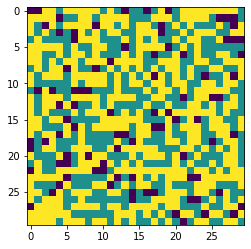

Unsatisfied percentage =  0.17222222222222222
Unsatisfied percentage =  0.09444444444444444
Unsatisfied percentage =  0.06666666666666667
Unsatisfied percentage =  0.051111111111111114
Unsatisfied percentage =  0.03222222222222222
Unsatisfied percentage =  0.01888888888888889
Unsatisfied percentage =  0.011111111111111112
Unsatisfied percentage =  0.0077777777777777776
Unsatisfied percentage =  0.008888888888888889
Unsatisfied percentage =  0.005555555555555556
Unsatisfied percentage =  0.0044444444444444444
Unsatisfied percentage =  0.0022222222222222222
Unsatisfied percentage =  0.0011111111111111111
Unsatisfied percentage =  0.0011111111111111111
Unsatisfied percentage =  0.0011111111111111111
Unsatisfied percentage =  0.0011111111111111111
Unsatisfied percentage =  0.0011111111111111111
Unsatisfied percentage =  0.0
all satisfied.
 steps:  17


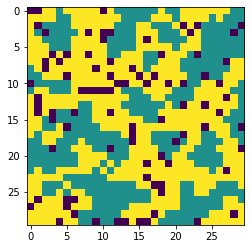

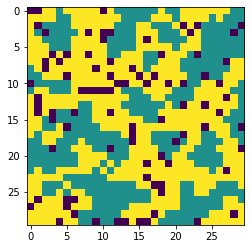

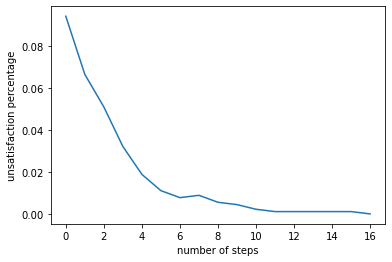

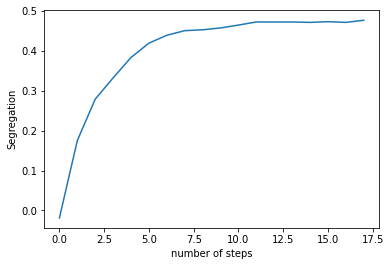

acabat


In [52]:
%run main.py -tp matrix -thold 0.3 -o 0.4 -t 0.5 -d 30

print("acabat")

0.5
ONE  72
TWO  57
EMPTY:  15
72
57
15


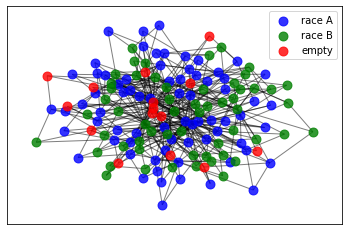

Unsatisfied percentage =  0.4444444444444444
Unsatisfied percentage =  0.3402777777777778
Unsatisfied percentage =  0.3472222222222222
Unsatisfied percentage =  0.3611111111111111
Unsatisfied percentage =  0.2569444444444444
Unsatisfied percentage =  0.24305555555555555
Unsatisfied percentage =  0.2847222222222222
Unsatisfied percentage =  0.22916666666666666
Unsatisfied percentage =  0.19444444444444445
Unsatisfied percentage =  0.16666666666666666
Unsatisfied percentage =  0.1736111111111111
Unsatisfied percentage =  0.1597222222222222
Unsatisfied percentage =  0.1736111111111111
Unsatisfied percentage =  0.16666666666666666
Unsatisfied percentage =  0.125
Unsatisfied percentage =  0.11805555555555555
Unsatisfied percentage =  0.11805555555555555
Unsatisfied percentage =  0.14583333333333334
Unsatisfied percentage =  0.13194444444444445
Unsatisfied percentage =  0.1388888888888889
Unsatisfied percentage =  0.1527777777777778
Unsatisfied percentage =  0.1527777777777778
Unsatisfied pe

Unsatisfied percentage =  0.006944444444444444
Unsatisfied percentage =  0.006944444444444444
Unsatisfied percentage =  0.006944444444444444
Unsatisfied percentage =  0.013888888888888888
Unsatisfied percentage =  0.020833333333333332
Unsatisfied percentage =  0.027777777777777776
Unsatisfied percentage =  0.034722222222222224
Unsatisfied percentage =  0.041666666666666664
Unsatisfied percentage =  0.027777777777777776
Unsatisfied percentage =  0.027777777777777776
Unsatisfied percentage =  0.027777777777777776
Unsatisfied percentage =  0.020833333333333332
Unsatisfied percentage =  0.027777777777777776
Unsatisfied percentage =  0.04861111111111111
Unsatisfied percentage =  0.04861111111111111
Unsatisfied percentage =  0.04861111111111111
Unsatisfied percentage =  0.04861111111111111
Unsatisfied percentage =  0.04861111111111111
Unsatisfied percentage =  0.04861111111111111
Unsatisfied percentage =  0.04861111111111111
Unsatisfied percentage =  0.034722222222222224
Unsatisfied percenta

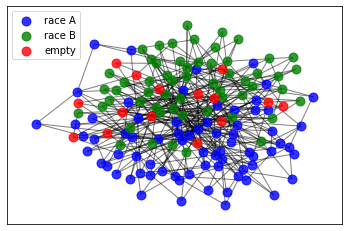

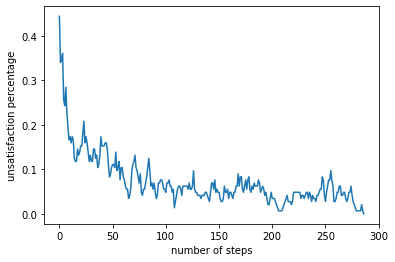

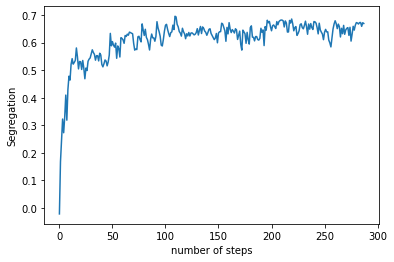

acabat


In [50]:
%run main.py -tp scalefree -thold 0.6 -o 0.5 -t 0.4 -d 12

print("acabat")